<a href="https://colab.research.google.com/github/nlnlvlc/big_data/blob/main/Big_Data_GA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

plt.style.use('dark_background')

In [ ]:
setOne = ['/content/table-1-1.xlsx', '/content/table-1-2.xlsx',
          '/content/table-1-3.xlsx', '/content/table-1-4.xlsx',
          '/content/table-1-5.xlsx', '/content/table-1-6.xlsx']

setTwo = ['/content/table-2-1.xlsx', '/content/table-2-2.xlsx',
          '/content/table-2-3.xlsx']

setThree = ['/content/table-3.xlsx']

In [ ]:
races = ['all', 'white', 'non-hispanic white', 'black',
         'asian', 'hispanic (of any race)']

In [ ]:
def process_tableOne(fileName: str):

  #extract data from excel file
  data = pd.read_excel(fileName, index_col=None, header=5)
  data.rename(columns = {'Unnamed: 0':'Ages', '11th grade2': '11th grade',
                         'High school graduate3':'High school graduate'}, inplace = True)
  #remove tabs
  data['Ages'] = data['Ages'].map(lambda x: x.lstrip('\t').lstrip())

  data.set_index("Ages", inplace=True)

  data.drop(['18 years and over', '25 years and over', '75 years and over'],
            inplace=True)
  #divide data into separate dataframes based on sex
  both_df = data.iloc[1:12]
  male_df = data.iloc[13:24]
  female_df = data.iloc[25:36]

  dfs = [["both", both_df], ["male", male_df], ["female", female_df]]

  return transposeDF(dfs)

In [ ]:
def transposeDF(dfs):

  for df in dfs:
    df[1] = df[1].transpose()

  return dfs

In [ ]:
def makeDict(files, races):

  #empty dictionary will act as object for json
  ed_dict = {}

  #get list of all education levels
  levels = list(process_tableOne(setOne[0])[0][1].index)

  for level in levels:
    if level not in ed_dict.keys():
      ed_dict.update({level: {}})
    for race in races:
      ed_dict[level].update({f"race: {race}": {}})

  for i in range(len(files)):
    #get processed dataframe of any Table.1.x
    #Rows: Education Levels
    #Columns: Age Groups
    sampleRace = f"race: {races[i]}"
    sample = process_tableOne(setOne[i])

    dfs = sample
    #go through each key in ed_dict
    for level in ed_dict.keys():
        #assign current dictionary
        curr = ed_dict[level][sampleRace]

        for df in dfs:
            sex = f"sex: {df[0]}"
            #initialize dict with sex, education and age keys
            #ages is a list of dictionaries
            obj = {
                    'ages': {}
                  }
            #only show pull data that matches education level
            row = df[1].loc[level]

            #columnName = Age Group, columnData = count
            #add age and count to obj['ages']
            for (columnName, columnData) in row.items():
                obj['ages'].update({columnName: columnData})

            #update using sex as an id
            curr[sex] = obj


  return ed_dict

In [ ]:
ed_dict = makeDict(setOne, races)

races = list(ed_dict['Total'].keys())

In [ ]:
print(ed_dict)

{'Total': {'race: all': {'sex: both': {'ages': {'18 to 24 years': 28981.0, '25 to 29 years': 21747.0, '30 to 34 years': 22836.0, '35 to 39 years': 21992.0, '40 to 44 years': 21198.0, '45 to 49 years': 19430.0, '50 to 54 years': 20700.0, '55 to 59 years': 21004.0, '60 to 64 years': 21174.0, '65 to 69 years': 18533.0, '70 to 74 years': 15171.0}}, 'sex: male': {'ages': {'18 to 24 years': 14567.0, '25 to 29 years': 10940.0, '30 to 34 years': 11386.0, '35 to 39 years': 10987.0, '40 to 44 years': 10593.0, '45 to 49 years': 9623.0, '50 to 54 years': 10261.0, '55 to 59 years': 10339.0, '60 to 64 years': 10203.0, '65 to 69 years': 8818.0, '70 to 74 years': 7012.0}}, 'sex: female': {'ages': {'18 to 24 years': 14413.0, '25 to 29 years': 10807.0, '30 to 34 years': 11450.0, '35 to 39 years': 11005.0, '40 to 44 years': 10605.0, '45 to 49 years': 9807.0, '50 to 54 years': 10440.0, '55 to 59 years': 10665.0, '60 to 64 years': 10971.0, '65 to 69 years': 9715.0, '70 to 74 years': 8159.0}}}, 'race: white

In [ ]:
with open('data.json', 'w') as json_file:
    json.dump(ed_dict, json_file, indent=4)  # 'indent' is optional, it formats the JSON with indentation for readability

In [ ]:
print(ed_dict['Doctoral degree']['race: all']['sex: both']['ages'].keys())

dict_keys(['18 to 24 years', '25 to 29 years', '30 to 34 years', '35 to 39 years', '40 to 44 years', '45 to 49 years', '50 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 69 years', '70 to 74 years'])


In [ ]:
def makePlots(ed_dict, race):
  # Visualization of attainment by sex as done in GA1
  desiredAttainments = [ "Master's degree", "Professional degree", "Doctoral degree" ]

  for attainment in desiredAttainments:
    f_data = ed_dict[attainment][race]['sex: female']['ages']
    m_data = ed_dict[attainment][race]['sex: male']['ages']

    age_groups = list(m_data.keys())
    f_counts = list(f_data.values())
    m_counts = list(m_data.values())

    x = np.arange(len(age_groups))

    BAR_WIDTH = 0.25
    _, ax = plt.subplots(layout='constrained')
    ax.bar(x, m_counts, BAR_WIDTH, label='Male')
    ax.bar(x + BAR_WIDTH, f_counts, BAR_WIDTH, label='Female')

    ax.set_title(f'{attainment} Attainment by Sex ({race})')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    ax.set_xlabel('Ages')
    ax.set_xticks(x + BAR_WIDTH/2, age_groups, ha='right')
    ax.tick_params(axis='x', rotation=45, labelsize=8)

    plt.show()

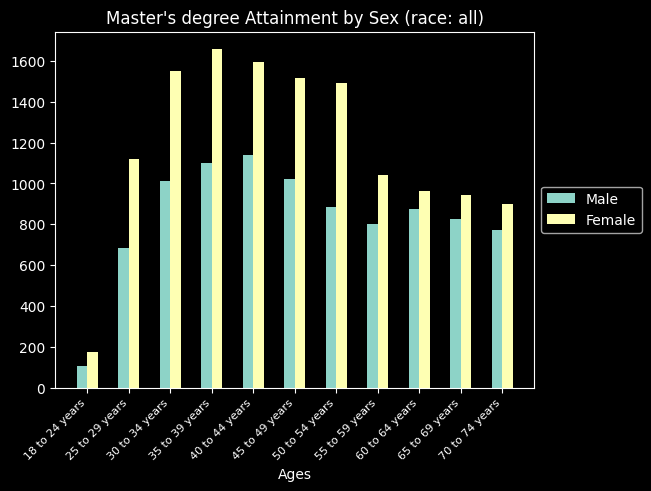

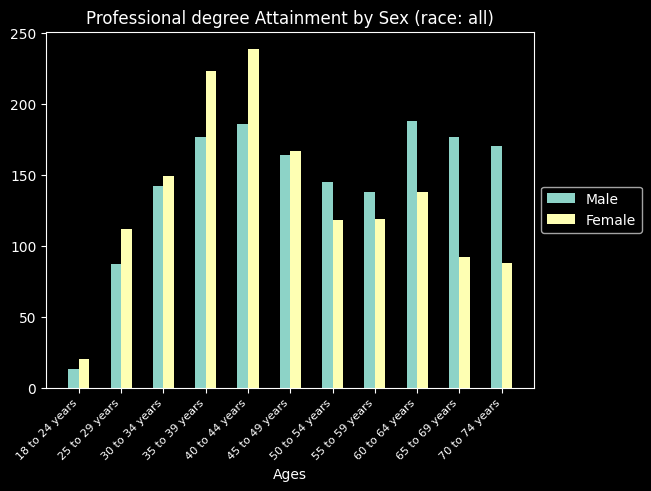

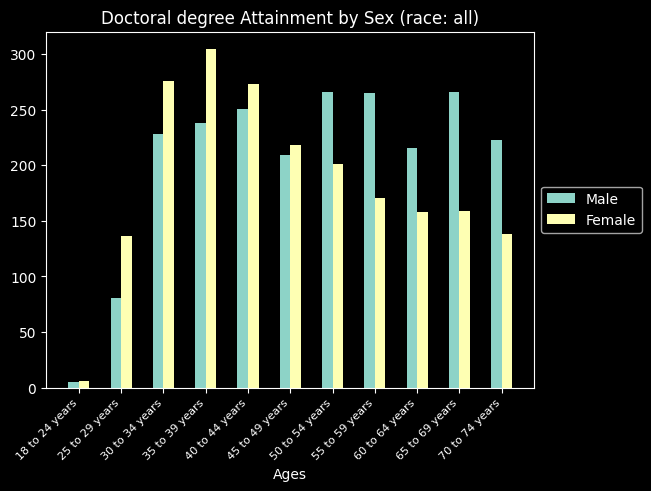

In [ ]:
#change index for races if want to produce graph for different races
#otherwise, throwing error after 4th loop
makePlots(ed_dict, races[0])